In [1]:
import keras
import keras.applications as app
from keras.models import Sequential, load_model, Model
from keras import models, optimizers
from keras.optimizers import SGD, RMSprop
from keras.layers import Input, Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D, GlobalMaxPooling2D, BatchNormalization
from keras.preprocessing.image import load_img, ImageDataGenerator
from keras import models
from keras.preprocessing import image
import numpy as np
from keras.applications import VGG16
from keras.callbacks import ModelCheckpoint
import time

Using TensorFlow backend.


In [26]:
img_size =224
vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))

In [27]:
vgg_conv.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [28]:
x = vgg_conv.output
x = GlobalAveragePooling2D()(x)
x = Dense(512,activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256,activation='relu')(x)
x = Dense(6,activation='softmax')(x)
first_model = Model(inputs=vgg_conv.input, outputs=x)

In [29]:
first_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [18]:
for i,layer in enumerate(first_model.layers):
    print(i,layer.name,layer.trainable)

0 input_2 False
1 block1_conv1 True
2 block1_conv2 True
3 block1_pool True
4 block2_conv1 True
5 block2_conv2 True
6 block2_pool True
7 block3_conv1 True
8 block3_conv2 True
9 block3_conv3 True
10 block3_pool True
11 block4_conv1 True
12 block4_conv2 True
13 block4_conv3 True
14 block4_pool True
15 block5_conv1 True
16 block5_conv2 True
17 block5_conv3 True
18 block5_pool True
19 global_average_pooling2d_3 True
20 dense_5 True
21 dropout_3 True
22 dense_6 True


In [30]:
for layer in first_model.layers[:15]:
    layer.trainable= False

In [31]:
first_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [32]:
train_data_set = './Training'
validation_set = './Validation'
test_data_set = './Test'
train_data_gen = ImageDataGenerator(rescale=1.0/255,rotation_range=15, shear_range=0.2,width_shift_range=0.13,height_shift_range=0.13,zoom_range=[0.6,0.2],horizontal_flip=True,fill_mode='nearest',data_format='channels_last')
valid_data_gen = ImageDataGenerator(rescale=1.0/255,data_format='channels_last')
train_set = train_data_gen.flow_from_directory(train_data_set,target_size=(224,224),batch_size=32,class_mode='categorical',shuffle=True,color_mode='rgb')
valid_set = valid_data_gen.flow_from_directory(validation_set,target_size=(224,224),batch_size=32,class_mode='categorical',shuffle=True,color_mode='rgb')


Found 9918 images belonging to 6 classes.
Found 1428 images belonging to 6 classes.


In [33]:
callback_ckpt = ModelCheckpoint("VGG16_weights{epoch:08d}.h5",period=15,save_weights_only=False,verbose=0)

In [34]:
first_model.compile(loss="categorical_crossentropy",optimizer=optimizers.SGD(lr=1e-4, momentum=0.9,nesterov=True),metrics=['accuracy'])

In [35]:
start = time.time()
history = first_model.fit_generator(train_set,steps_per_epoch=9918//32,epochs=45,validation_data=valid_set,validation_steps=1428//32,callbacks=[callback_ckpt])
print("time :", time.time() - start)
first_model.save("VGG16_Transfer_Learning_1.h5")

Epoch 1/45
309/309 [==============================] - 227s 736ms/step - loss: 1.8189 - acc: 0.1905 - val_loss: 1.7725 - val_acc: 0.2536
Epoch 2/45
309/309 [==============================] - 221s 715ms/step - loss: 1.7760 - acc: 0.2245 - val_loss: 1.7548 - val_acc: 0.2894
Epoch 3/45
309/309 [==============================] - 220s 712ms/step - loss: 1.7339 - acc: 0.2587 - val_loss: 1.7084 - val_acc: 0.3109
Epoch 4/45
309/309 [==============================] - 221s 714ms/step - loss: 1.6634 - acc: 0.3154 - val_loss: 1.6735 - val_acc: 0.3123
Epoch 5/45
309/309 [==============================] - 221s 715ms/step - loss: 1.5846 - acc: 0.3529 - val_loss: 1.6159 - val_acc: 0.3431
Epoch 6/45
309/309 [==============================] - 220s 713ms/step - loss: 1.5191 - acc: 0.3872 - val_loss: 1.5675 - val_acc: 0.3646
Epoch 7/45
309/309 [==============================] - 228s 739ms/step - loss: 1.4672 - acc: 0.4152 - val_loss: 1.5295 - val_acc: 0.3703
Epoch 8/45
309/309 [============================

In [36]:
import matplotlib.pyplot as plt

In [37]:
first_model.metrics_names

['loss', 'acc']

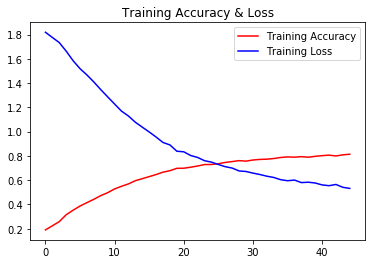

In [38]:
acc = history.history['acc']
loss = history.history['loss']
epochs = range(len(acc))
plt.plot(epochs,acc,'r',label='Training Accuracy')
plt.title("Training Accuracy & Loss")
plt.plot(epochs,loss,'b',label='Training Loss')
plt.legend()

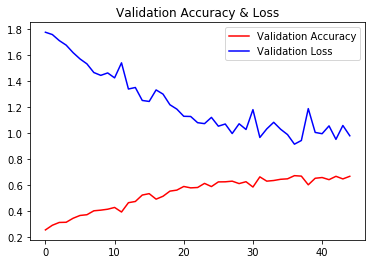

In [40]:
plt.clf()
val_acc = history.history['val_acc']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs,val_acc,'r',label='Validation Accuracy')
plt.title("Validation Accuracy & Loss")
plt.plot(epochs,val_loss,'b',label='Validation Loss')
plt.legend()

In [42]:
test_data_gen = ImageDataGenerator(rescale=1.0/255,data_format='channels_last')
test_set_generator = test_data_gen.flow_from_directory(test_data_set,target_size=(224,224),batch_size=16,class_mode='categorical',color_mode='rgb',shuffle=True)
first_model.evaluate_generator(test_set_generator,steps=2860//16,verbose=1)

Found 2860 images belonging to 6 classes.
178/178 [==============================] - 37s 205ms/step


[1.042558168594757, 0.6390449438202247]

In [34]:
callback_ckpt = ModelCheckpoint("VGG16_weights{epoch:08d}.h5",period=15,save_weights_only=False,verbose=0)
first_model.compile(loss="categorical_crossentropy",optimizer=optimizers.SGD(lr=1e-4, momentum=0.9,nesterov=True),metrics=['accuracy'])
start = time.time()
history2 = first_model.fit_generator(train_set,steps_per_epoch=15672//32,epochs=45,validation_data=valid_set,validation_steps=2254//32,callbacks=[callback_ckpt])
print("time :", time.time() - start)
first_model.save("VGG16_Transfer_Learning_2.h5")

Epoch 1/45
424/489 [=========================>....] - ETA: 44s - loss: 1.3668 - acc: 0.5495

C:\Users\Hou\AppData\Local\conda\conda\envs\Keras_TF\lib\site-packages\PIL\TiffImagePlugin.py:768: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 2. Skipping tag 41486
  " Skipping tag %s" % (size, len(data), tag))


489/489 [==============================] - 356s 728ms/step - loss: 1.3644 - acc: 0.5489 - val_loss: 1.6995 - val_acc: 0.4352
Epoch 2/45
489/489 [==============================] - 346s 707ms/step - loss: 1.3607 - acc: 0.5476 - val_loss: 1.7296 - val_acc: 0.4271
Epoch 3/45
489/489 [==============================] - 342s 700ms/step - loss: 1.3328 - acc: 0.5622 - val_loss: 1.6910 - val_acc: 0.4298
Epoch 4/45
489/489 [==============================] - 344s 703ms/step - loss: 1.3429 - acc: 0.5556 - val_loss: 1.7327 - val_acc: 0.4208
Epoch 5/45
489/489 [==============================] - 347s 710ms/step - loss: 1.3274 - acc: 0.5623 - val_loss: 1.6898 - val_acc: 0.4343
Epoch 6/45
489/489 [==============================] - 339s 694ms/step - loss: 1.3274 - acc: 0.5661 - val_loss: 1.7599 - val_acc: 0.4140
Epoch 7/45
489/489 [==============================] - 343s 702ms/step - loss: 1.3419 - acc: 0.5593 - val_loss: 1.7590 - val_acc: 0.4140
Epoch 8/45
489/489 [==============================] - 344s 

KeyboardInterrupt: 